<a href="https://colab.research.google.com/github/MohnishK7/Deeplearning/blob/main/linearreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
# define the parameter

In [3]:
learning_parameter = 0.01
epochs = 300

In [4]:
sample_points = 50

x_train = np.linspace(0,30,sample_points)
y_train = 6*x_train + 7*np.random.randn(sample_points)


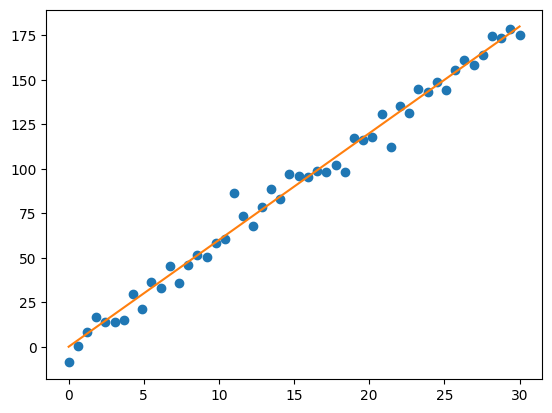

In [7]:
plt.plot(x_train, y_train,'o')
plt.plot(x_train, 6*x_train)
plt.show()

In [20]:
Y = tf.placeholder(tf.float32)
X = tf.placeholder(tf.float32)

W = tf.Variable(np.random.randn(), name = 'Weights')
B = tf.Variable(np.random.randn(), name = 'Bias')


In [21]:
#create the model for regression
prediction = W*X + B

In [22]:
#cost function
cost_iteration = tf.reduce_sum((prediction - Y)**2)/(2*sample_points)

In [23]:
#optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_parameter).minimize(cost_iteration)

In [24]:
init = tf.global_variables_initializer()

Epochs 0.000000 Cost 0.000599 Weight 5.840763 Bias 0.014715
Epochs 40.000000 Cost 0.208786 Weight 5.988149 Bias -0.082390
Epochs 80.000000 Cost 0.210146 Weight 5.991864 Bias -0.178970
Epochs 120.000000 Cost 0.211380 Weight 5.995227 Bias -0.266426
Epochs 160.000000 Cost 0.212500 Weight 5.998272 Bias -0.345621
Epochs 200.000000 Cost 0.213520 Weight 6.001030 Bias -0.417334
Epochs 240.000000 Cost 0.214443 Weight 6.003528 Bias -0.482270
Epochs 280.000000 Cost 0.215280 Weight 6.005789 Bias -0.541073


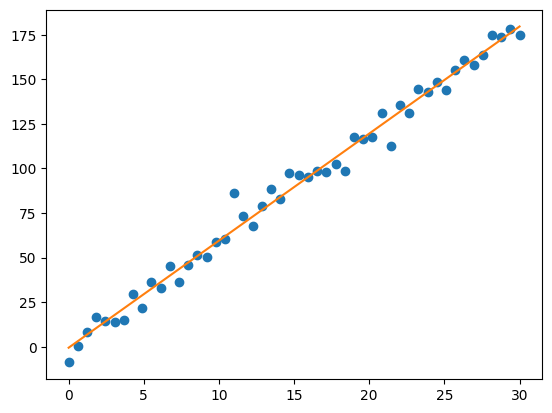

In [25]:
#define tensorflow session
with tf.Session() as sess:
  sess.run(init)
  for epoch in range(epochs):
    for x, y in zip(x_train, y_train):
      sess.run(optimizer, feed_dict = {X : x, Y : y})
    if not epoch%40:
      W1  = sess.run(W)
      B1 = sess.run(B)
      cost_iter = sess.run(cost_iteration, feed_dict = {X : x, Y : y})
      print('Epochs %f Cost %f Weight %f Bias %f' %(epoch, cost_iter, W1, B1))
  Weight = sess.run(W)
  Bias = sess.run(B)

  plt.plot(x_train,y_train,'o')
  plt.plot(x_train,Weight*x_train+Bias)
  plt.show()